In [45]:
import pandas as pd
import pandas_datareader.data as web
import datetime as dt
import matplotlib.pyplot as plt
import seaborn as sns

In [19]:
tickers = ['AAPL', 'IBM', 'GOOG', 'FB', 'AMZN', 'NVDA','AMD', 'RBLX', 'NFLX', 'E', 
           'STLA', 'STM', 'MRNA', 'PFE', 'DIS', 'UBER', 'LHCG', 'CVX', 'REY.MI']

stocks = ['Apple', 'IBM', 'Alphabet', 'Meta', 'Amazon', 'NVIDIA', 'AMD', 'Roblox', 'Netflix', 'ENI',
         'Stellantis', 'STMicroelectronics', 'Moderna', 'Pfizer', 'Walt_Disney', 'UBER', 'LHC Group', 'Chevron', 'Reply']

markets = ['Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'NYSE',
           'NYSE', 'NYSE', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Nasdaq', 'Borsa Valori Milano']

fields = ['Informatica', 'Informatica', 'Informatica', 'Informatica', 'Informatica', 'Elettronica', 'Elettronica', 
          'Intrattenimento', 'Intrattenimento', 'Energia', 'Automobilistico', 'Elettronica', 'Salute', 'Salute',
           'Intrattenimento', 'Informatica', 'Salute', 'Energia', 'Consulenza']

stocks_dict = {'ticker': tickers, 'stock': stocks, 'market': markets, 'field': fields}


stocks_df = pd.DataFrame(stocks_dict)

stocks_df

,ticker,stock,market,field
0,AAPL,Apple,Nasdaq,Informatica
1,IBM,IBM,Nasdaq,Informatica
2,GOOG,Alphabet,Nasdaq,Informatica
3,FB,Meta,Nasdaq,Informatica
4,AMZN,Amazon,Nasdaq,Informatica
5,NVDA,NVIDIA,Nasdaq,Elettronica
6,AMD,AMD,Nasdaq,Elettronica
7,RBLX,Roblox,Nasdaq,Intrattenimento
8,NFLX,Netflix,Nasdaq,Intrattenimento
9,E,ENI,NYSE,Energia


In [41]:
stocks_df.field.unique()

array(['Informatica', 'Elettronica', 'Intrattenimento', 'Energia',
       'Automobilistico', 'Salute', 'Consulenza'], dtype=object)

<AxesSubplot:ylabel='stock'>

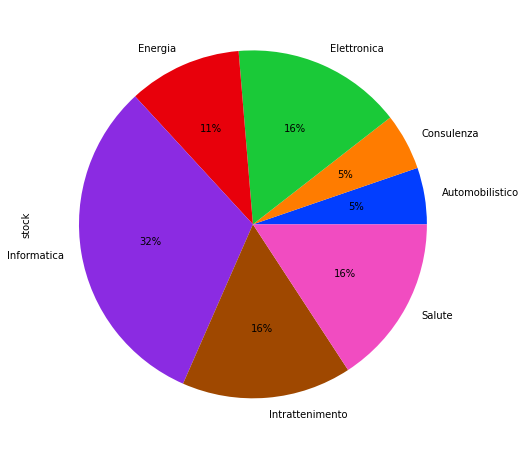

In [43]:
stocks_df.groupby('field').stock.count().plot.pie(figsize = (8, 8), 
                                                  colors = sns.color_palette('bright')[0:7], 
                                                  autopct='%.0f%%')

In [49]:
all_stock_df = pd.DataFrame()
all_stock_df.shape[0] == 0

True

In [52]:
start_date = '2011-11-30'
end_date = '2021-11-30'

df_list = []



for t in stocks_df.ticker.unique():
    df = web.get_data_yahoo(t, start_date, end_date)
    df['ticker'] = t
    df_list.append(df)



all_stock_df = pd.concat(df_list)       
        

In [53]:
all_stock_df.sample(10)

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2016-06-10,725.890015,716.429993,719.469971,719.409973,1216400.0,719.409973,GOOG
2012-06-22,3.078947,3.078947,3.078947,3.078947,0.0,2.255979,STLA
2021-02-10,566.650024,553.460022,562.500000,563.590027,3991300.0,563.590027,NFLX
2015-03-26,83.769997,82.139999,82.720001,83.010002,32794800.0,83.010002,FB
2012-01-23,3.927632,3.927632,3.927632,3.927632,1064.0,2.877820,STLA
2020-08-17,116.087502,113.962502,116.062500,114.607498,119561600.0,113.564423,AAPL
2013-06-21,24.700001,24.049999,24.590000,24.530001,45833900.0,24.530001,FB
2019-11-22,72.400002,69.800003,70.199997,70.000000,119445.0,69.085693,REY.MI
2020-07-10,182.199997,178.149994,178.839996,181.320007,152200.0,181.320007,LHCG


<AxesSubplot:xlabel='ticker'>

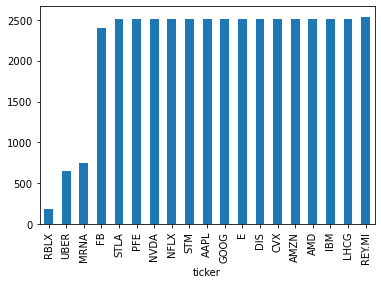

In [59]:
all_stock_df.groupby('ticker').Close.count().sort_values().plot.bar()

In [65]:
all_stock_df[all_stock_df['ticker'] == 'RBLX']

,High,Low,Open,Close,Volume,Adj Close,ticker
Date,,,,,,,
2021-03-10,74.830002,60.500000,64.500000,69.500000,97069300.0,69.500000,RBLX
2021-03-11,77.779999,70.129997,74.930000,73.900002,59629300.0,73.900002,RBLX
2021-03-12,72.959999,69.110001,72.470001,69.699997,19714700.0,69.699997,RBLX
2021-03-15,74.059998,66.250000,70.019997,72.150002,19549800.0,72.150002,RBLX
2021-03-16,78.000000,73.180000,73.730003,77.000000,30274400.0,77.000000,RBLX
...,...,...,...,...,...,...,...
2021-11-23,121.289001,113.330002,119.870003,114.870003,25930900.0,114.870003,RBLX
2021-11-24,126.000000,115.809998,116.680000,124.230003,28221200.0,124.230003,RBLX
2021-11-26,131.000000,120.239998,129.500000,122.650002,11288400.0,122.650002,RBLX


<AxesSubplot:xlabel='Date'>

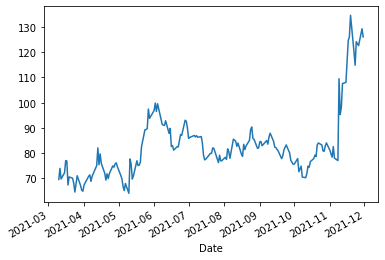

In [66]:
all_stock_df[all_stock_df['ticker'] == 'RBLX']['Adj Close'].plot()

In [76]:
start_date = '2011-11-30'
end_date = '2021-11-30'



merged_df = pd.DataFrame()
for t in stocks_df.ticker.unique():
    if merged_df.shape[0] == 0:
        merged_df = web.get_data_yahoo(t, start_date, end_date).add_suffix('_' + str(t))
        print(t)
        print(merged_df.head())
    else:
        print(t)
        df = web.get_data_yahoo(t, start_date, end_date).add_suffix('_' + str(t))
        merged_df = merged_df.join(df)

    



merged_df.head()        

AAPL
            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL  
Date                        
2011-11-30       11.688141  
2011-12-01       11.863375  
2011-12-02       11.917500  
2011-12-05       12.018726  
2011-12-06       11.955726  
IBM
            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.

            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL    High_IBM     Low_IBM    Open_IBM   Close_IBM  \
Date                                                                         
2011-11-30       11.688141  180.066925  176.108994  176.453156  179.732315   
2011-12-01       11.863375  181.634796  178.556412  178.785858  181.118546   
2011-12-02       11.917500  182.915863  181.118546  181.567871  181.319305   
2011-12-05       12.018726  185.095596  182.007645  182.772461  182.447418   
2011-12-06       11.955726 

            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL    High_IBM     Low_IBM    Open_IBM   Close_IBM  \
Date                                                                         
2011-11-30       11.688141  180.066925  176.108994  176.453156  179.732315   
2011-12-01       11.863375  181.634796  178.556412  178.785858  181.118546   
2011-12-02       11.917500  182.915863  181.118546  181.567871  181.319305   
2011-12-05       12.018726  185.095596  182.007645  182.772461  182.447418   
2011-12-06       11.955726 

            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL    High_IBM     Low_IBM    Open_IBM   Close_IBM  \
Date                                                                         
2011-11-30       11.688141  180.066925  176.108994  176.453156  179.732315   
2011-12-01       11.863375  181.634796  178.556412  178.785858  181.118546   
2011-12-02       11.917500  182.915863  181.118546  181.567871  181.319305   
2011-12-05       12.018726  185.095596  182.007645  182.772461  182.447418   
2011-12-06       11.955726 

            High_AAPL   Low_AAPL  Open_AAPL  Close_AAPL  Volume_AAPL  \
Date                                                                   
2011-11-30  13.652857  13.510714  13.617500   13.650000  405938400.0   
2011-12-01  13.892857  13.598214  13.662143   13.854643  387181200.0   
2011-12-02  14.058214  13.877857  13.922500   13.917857  379055600.0   
2011-12-05  14.157500  13.942500  14.053214   14.036071  357210000.0   
2011-12-06  14.093929  13.906429  14.018214   13.962500  283598000.0   

            Adj Close_AAPL    High_IBM     Low_IBM    Open_IBM   Close_IBM  \
Date                                                                         
2011-11-30       11.688141  180.066925  176.108994  176.453156  179.732315   
2011-12-01       11.863375  181.634796  178.556412  178.785858  181.118546   
2011-12-02       11.917500  182.915863  181.118546  181.567871  181.319305   
2011-12-05       12.018726  185.095596  182.007645  182.772461  182.447418   
2011-12-06       11.955726 

,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_REY.MI,Low_REY.MI,Open_REY.MI,Close_REY.MI,Volume_REY.MI,Adj Close_REY.MI
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-30,13.652857,13.510714,13.617500,13.650000,405938400.0,11.688141,180.066925,176.108994,176.453156,179.732315,...,100.500000,102.820000,13373200.0,67.437927,3.9675,3.8400,3.8650,3.9675,41920.0,3.561678
2011-12-01,13.892857,13.598214,13.662143,13.854643,387181200.0,11.863375,181.634796,178.556412,178.785858,181.118546,...,102.820000,101.830002,7007200.0,66.788605,4.0125,3.9000,3.9575,3.9950,36468.0,3.586365
2011-12-02,14.058214,13.877857,13.922500,13.917857,379055600.0,11.917500,182.915863,181.118546,181.567871,181.319305,...,103.040001,101.690002,6638100.0,66.696785,4.0400,3.9525,4.0125,4.0075,14692.0,3.597587
2011-12-05,14.157500,13.942500,14.053214,14.036071,357210000.0,12.018726,185.095596,182.007645,182.772461,182.447418,...,103.580002,102.820000,6121800.0,67.437927,4.0750,3.9775,4.0125,4.0525,36652.0,3.637984
2011-12-06,14.093929,13.906429,14.018214,13.962500,283598000.0,11.955726,185.019119,181.950287,182.265778,184.455063,...,103.099998,104.360001,7445000.0,68.447998,4.0625,3.9900,4.0550,4.0375,24400.0,3.624519


In [78]:
merged_df.head()

,High_AAPL,Low_AAPL,Open_AAPL,Close_AAPL,Volume_AAPL,Adj Close_AAPL,High_IBM,Low_IBM,Open_IBM,Close_IBM,...,Open_CVX,Close_CVX,Volume_CVX,Adj Close_CVX,High_REY.MI,Low_REY.MI,Open_REY.MI,Close_REY.MI,Volume_REY.MI,Adj Close_REY.MI
Date,,,,,,,,,,,,,,,,,,,,,
2011-11-30,13.652857,13.510714,13.617500,13.650000,405938400.0,11.688141,180.066925,176.108994,176.453156,179.732315,...,100.500000,102.820000,13373200.0,67.437927,3.9675,3.8400,3.8650,3.9675,41920.0,3.561678
2011-12-01,13.892857,13.598214,13.662143,13.854643,387181200.0,11.863375,181.634796,178.556412,178.785858,181.118546,...,102.820000,101.830002,7007200.0,66.788605,4.0125,3.9000,3.9575,3.9950,36468.0,3.586365
2011-12-02,14.058214,13.877857,13.922500,13.917857,379055600.0,11.917500,182.915863,181.118546,181.567871,181.319305,...,103.040001,101.690002,6638100.0,66.696785,4.0400,3.9525,4.0125,4.0075,14692.0,3.597587
2011-12-05,14.157500,13.942500,14.053214,14.036071,357210000.0,12.018726,185.095596,182.007645,182.772461,182.447418,...,103.580002,102.820000,6121800.0,67.437927,4.0750,3.9775,4.0125,4.0525,36652.0,3.637984
2011-12-06,14.093929,13.906429,14.018214,13.962500,283598000.0,11.955726,185.019119,181.950287,182.265778,184.455063,...,103.099998,104.360001,7445000.0,68.447998,4.0625,3.9900,4.0550,4.0375,24400.0,3.624519


<AxesSubplot:xlabel='Date'>

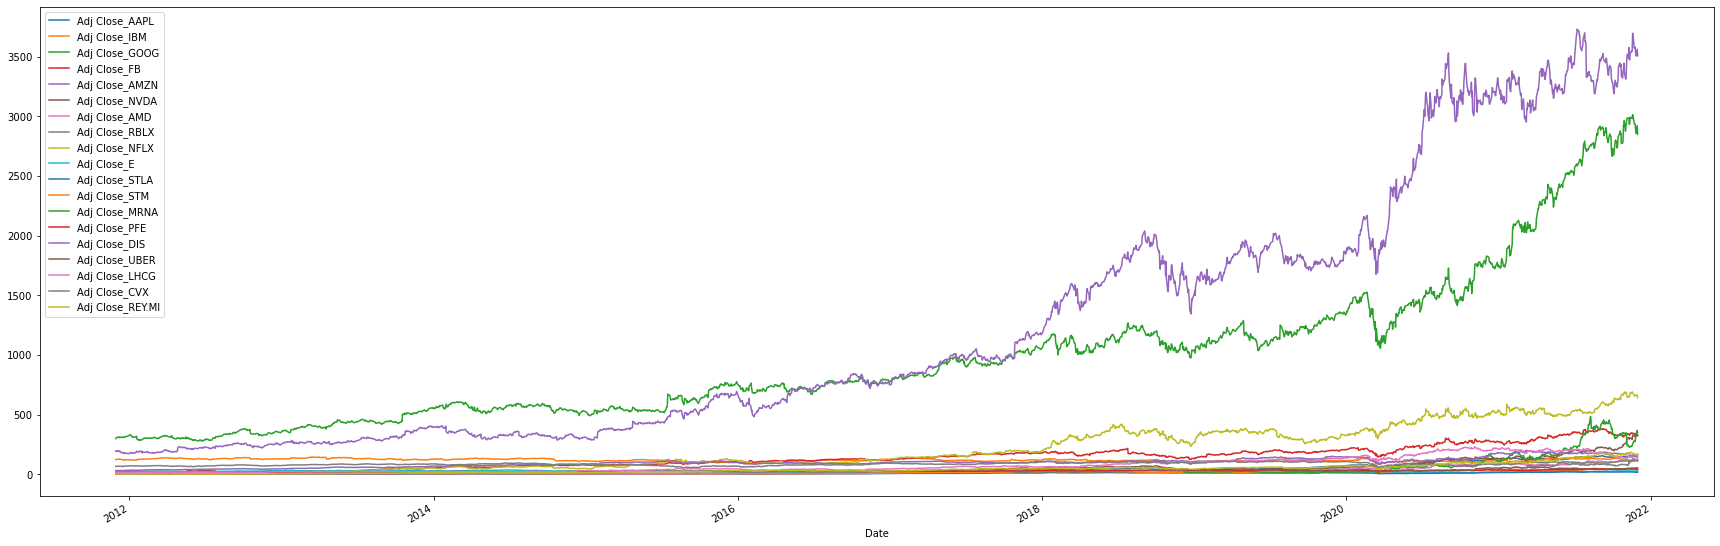

In [108]:

adj_close_columns = [col for col in merged_df.columns if "Adj Close" in col]
merged_df[adj_close_columns].plot(figsize=(30, 10))


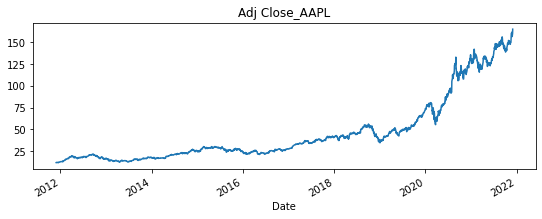

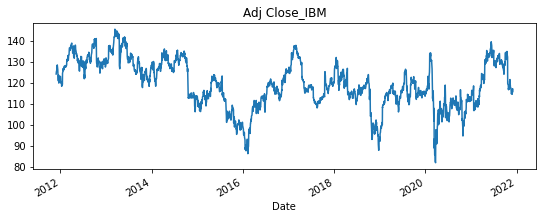

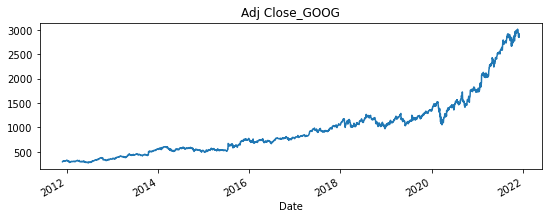

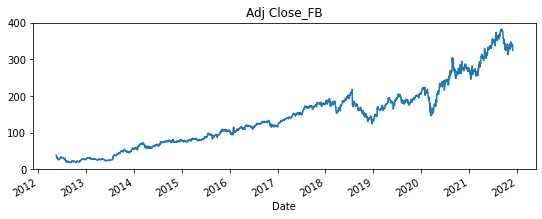

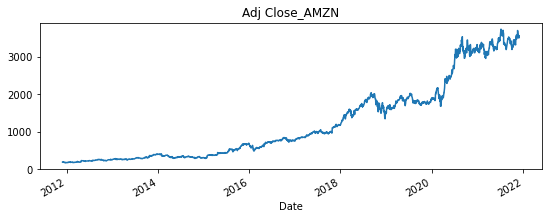

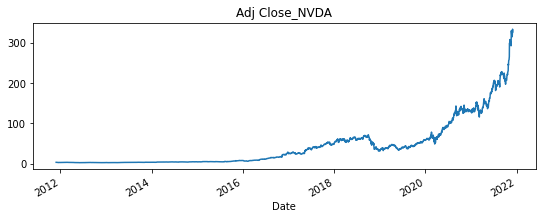

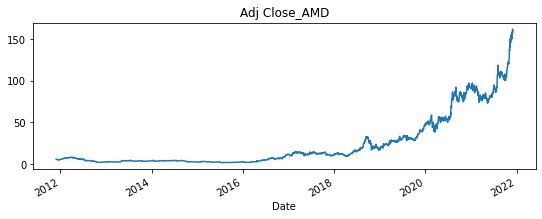

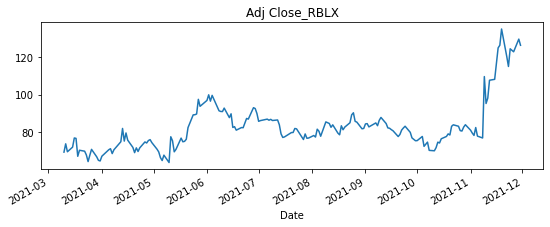

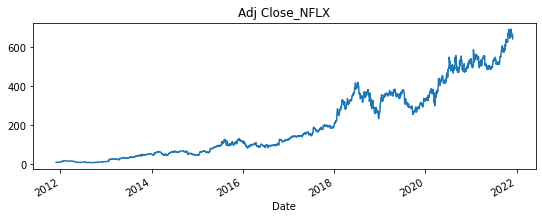

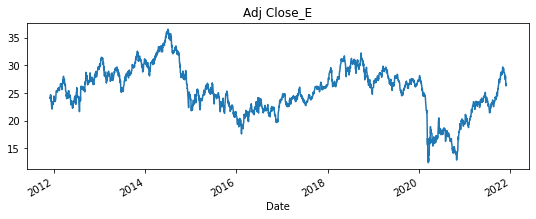

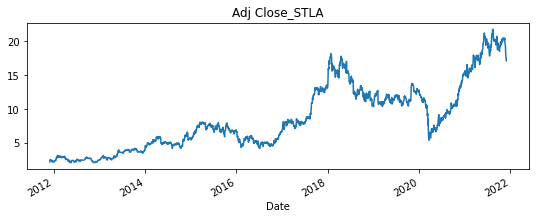

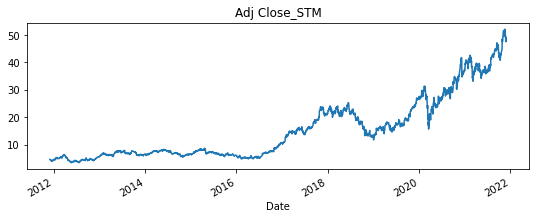

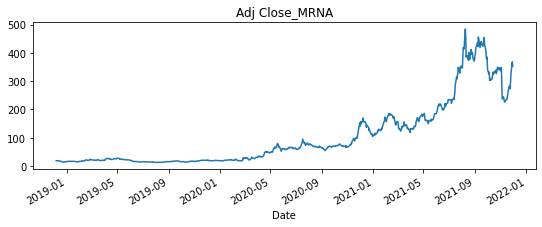

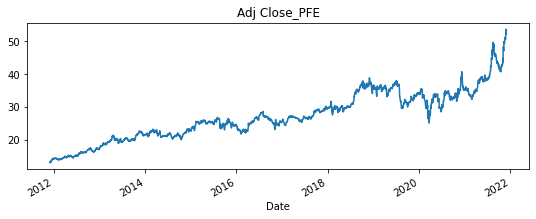

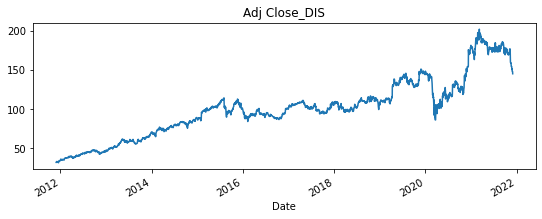

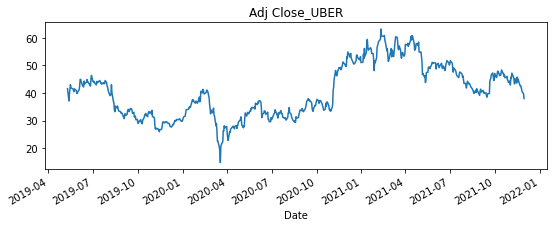

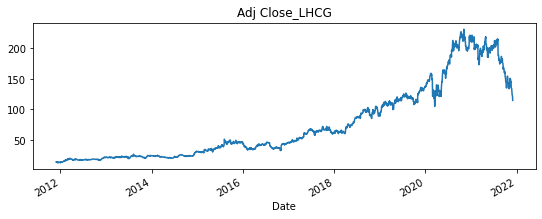

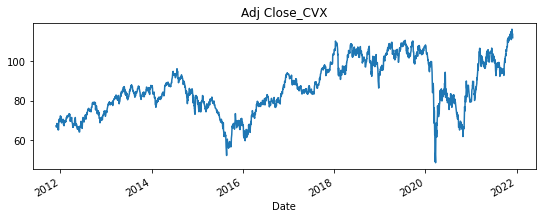

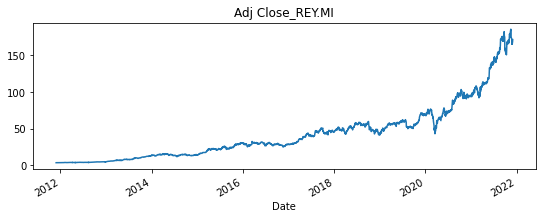

In [111]:
for col in adj_close_columns:
    merged_df[col].plot(figsize=(9, 3))
    plt.title(col)
    plt.show()


<AxesSubplot:xlabel='ticker'>

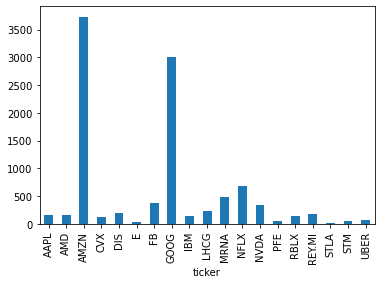

In [105]:
all_stock_df.groupby('ticker')['Adj Close'].max().plot.bar()